In [1]:
from keras import layers
from keras import models

c:\users\gene\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Model deifinition Type 1 class
#순서대로 쌓아올린 형태
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,))) #32 is output size
model.add(layers.Dense(10, activation='softmax'))

In [3]:
#Model deifinition Type 2 API function
#특정형태가 없는 경우
input_tensor = layers.Input(shape = (784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs = output_tensor)

In [4]:
from keras import optimizers

In [5]:
model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = 'mse',
              metrics = ['accuracy'])

#model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

# Example1 - Binary Classification
## dataset : IMDB dataset

In [6]:
from keras.datasets import imdb

In [7]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
#Model setting
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #relu, tanh
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss = losses.mean_squared_error, 
              metrics=[metrics.binary_accuracy])


In [11]:
#Data partitioning
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size = 512, 
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 553us/step - loss: 0.1699 - binary_accuracy: 0.7785 - val_loss: 0.1173 - val_binary_accuracy: 0.8748
Epoch 2/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.0908 - binary_accuracy: 0.9058 - val_loss: 0.0918 - val_binary_accuracy: 0.8910
Epoch 3/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.0636 - binary_accuracy: 0.9329 - val_loss: 0.0919 - val_binary_accuracy: 0.8767
Epoch 4/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.0506 - binary_accuracy: 0.9451 - val_loss: 0.0842 - val_binary_accuracy: 0.8848
Epoch 5/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.0412 - binary_accuracy: 0.9574 - val_loss: 0.0834 - val_binary_accuracy: 0.8871
Epoch 6/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.0332 - binary_accuracy: 0.9656 - val_loss: 0.0984 - val_bi

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#plt.show()

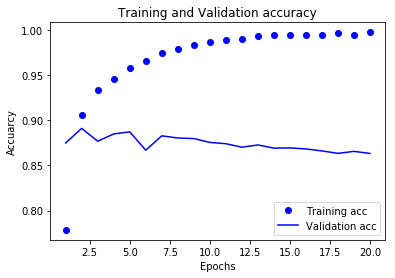

In [14]:
#plt.clf() #initialize graph
acc = history_dict['binary_accuracy'] # Or acc
val_acc = history_dict['val_binary_accuracy'] # or val_acc

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuarcy")
plt.legend()

In [15]:
results = model.evaluate(x_test, y_test) #extract loss and accuracy
print(results)

model.predict(x_test) # Extract the prediction each observations


25000/25000 [==============================] - 3s 133us/step
[0.1224153914257884, 0.8506]


array([[0.00749958],
       [0.99999464],
       [0.6515182 ],
       ...,
       [0.01822478],
       [0.03483384],
       [0.7244414 ]], dtype=float32)

# Example2 - Multiclass Classification 
## Dataset : Reuters | News articles

In [16]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) =reuters.load_data(num_words=10000)

In [17]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [18]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
#cf to categorize label values
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [20]:
#Model setting

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy',
              metrics=['accuracy'])  # when you want to use integer label, change to 'sparse_categorical_crossentropy'

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 147us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 102us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
E

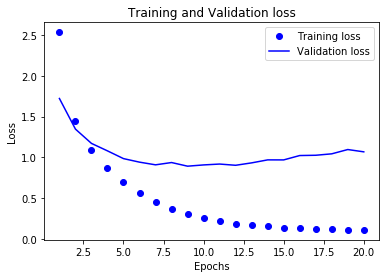

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#plt.show()

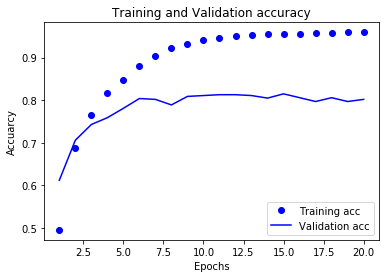

In [24]:
#plt.clf() #initialize graph
acc = history_dict['acc'] # Or acc
val_acc = history_dict['val_acc'] # or val_acc

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuarcy")
plt.legend()

In [25]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results , '\n')

model.predict(x_test)

2246/2246 [==============================] - 0s 138us/step
[1.209260305122722, 0.778717720444884] 



array([[1.0153334e-06, 8.0543697e-07, 5.8381366e-09, ..., 4.2193125e-09,
        9.1128149e-10, 7.5244744e-10],
       [7.0487644e-04, 3.6195854e-03, 3.6520760e-07, ..., 2.1257430e-08,
        2.6923710e-09, 1.2384052e-05],
       [2.3494592e-02, 8.8637012e-01, 4.1872630e-04, ..., 9.7960901e-06,
        2.9781543e-06, 3.2534765e-05],
       ...,
       [2.5995141e-07, 1.2386270e-06, 6.4118900e-08, ..., 2.7327940e-09,
        1.2517115e-08, 1.3348533e-09],
       [2.6321763e-03, 1.3715389e-01, 3.4821639e-04, ..., 3.7781785e-05,
        1.4642801e-06, 2.4253677e-06],
       [7.5477335e-05, 7.2774523e-01, 1.9414516e-02, ..., 2.9387945e-07,
        2.2065385e-09, 1.4441764e-06]], dtype=float32)

# Example3 - Regression
## Dataset :  Boston_housing

In [26]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

In [27]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [28]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])
    return model

In [36]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_mae_histories = []

for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples ]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples ]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data, val_targets), epochs = num_epochs, batch_size = 1, verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


Text(0,0.5,'Validation MAE')

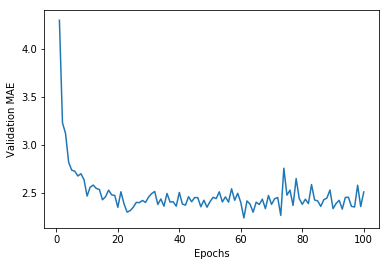

In [38]:
import matplotlib.pyplot as plt

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

In [43]:
def smooth_curve(points, factor = 0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1- factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


Text(0,0.5,'Validation MAE')

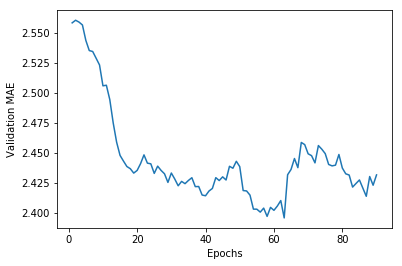

In [50]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

In [51]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mse_score, test_mae_score

102/102 [==============================] - 0s 1ms/step


(3058390.3333333335, 1736.143257889093)

In [54]:
average_mae_history[10]

2.558466986854478